<a href="https://colab.research.google.com/github/Nourhan-Ibrahim-1/Assignment3_AI_Platform/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [21]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

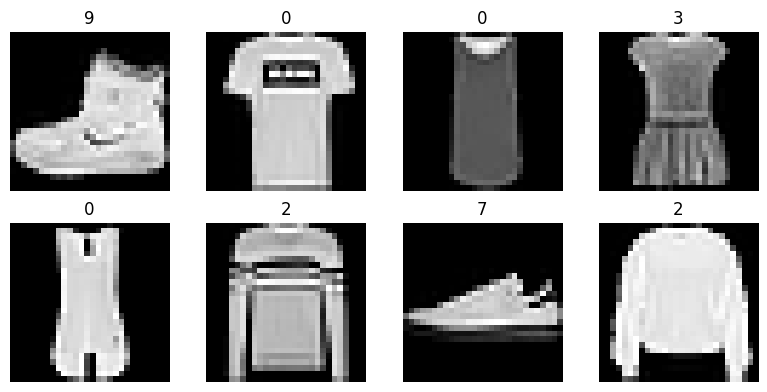

In [22]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0


In [24]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test  = x_test.reshape((x_test.shape[0], 28*28))


In [25]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [26]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7401 - loss: 0.7330 - val_accuracy: 0.8494 - val_loss: 0.4122
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8543 - loss: 0.3998 - val_accuracy: 0.8657 - val_loss: 0.3660
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8682 - loss: 0.3604 - val_accuracy: 0.8742 - val_loss: 0.3434
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8768 - loss: 0.3276 - val_accuracy: 0.8778 - val_loss: 0.3361
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8833 - loss: 0.3157 - val_accuracy: 0.8785 - val_loss: 0.3439
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8880 - loss: 0.3043 - val_accuracy: 0.8812 - val_loss: 0.3260
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8887 - loss: 0.2965 - val_accuracy: 0.8834 - val_loss: 0.3211
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8949 - loss: 0.2837 - val_acc

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8796


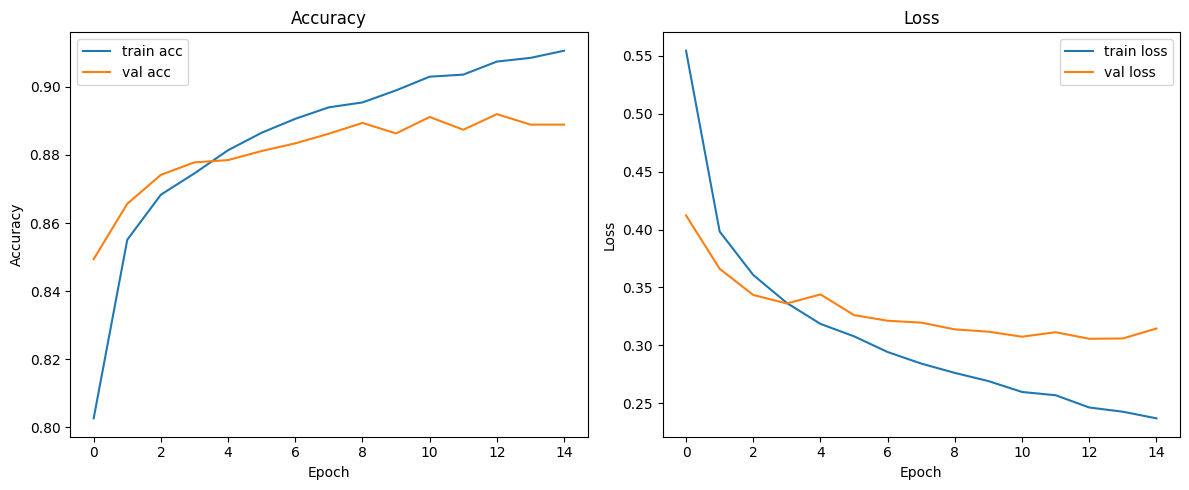

In [30]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]



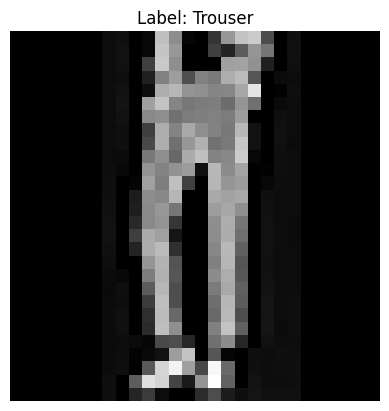

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST class names
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Pick a random index
rand_index = np.random.randint(0, x_train.shape[0])

# Get the image and label
random_image = x_train[rand_index].reshape(28, 28)
random_label = np.argmax(y_train[rand_index])

# Show the image
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {class_names[random_label]}")
plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


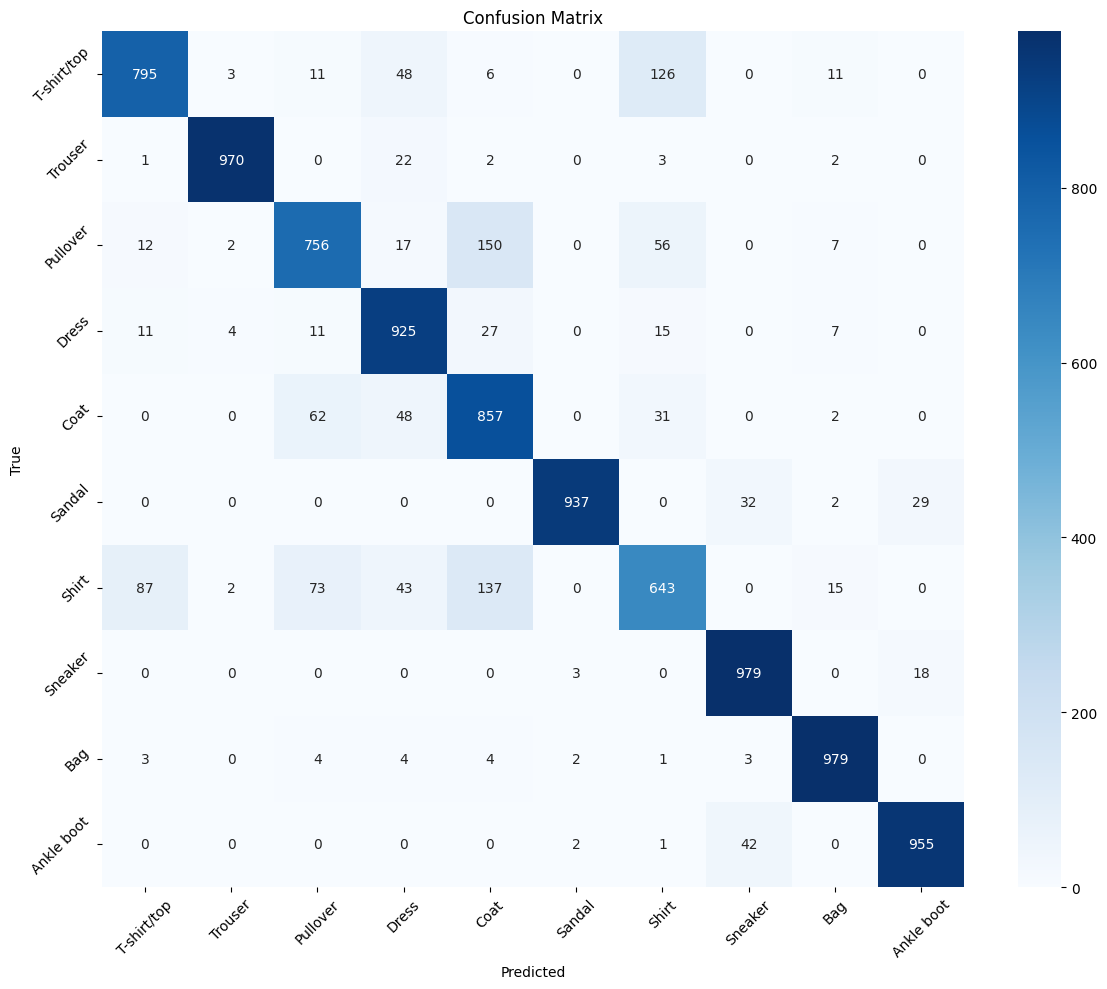

In [40]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
